In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../dataset/d_train_20180102.csv',encoding='gbk')
test = pd.read_csv('../dataset/d_test_A_20180102.csv',encoding='gbk')
print(train.shape)
print(test.shape)

(5642, 42)
(1000, 41)


In [3]:
train.head()

,id,性别,年龄,体检日期,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,...,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%,血糖
0,1,男,41,12/10/2017,24.96,23.10,99.59,20.23,76.88,49.60,...,166.0,9.9,17.4,0.164,54.1,34.2,6.5,4.7,0.6,6.06
1,2,男,41,19/10/2017,24.57,36.25,67.21,79.00,79.43,47.76,...,277.0,9.2,10.3,0.260,52.0,36.7,5.8,4.7,0.8,5.39
2,3,男,46,26/10/2017,20.82,15.23,63.69,38.17,86.23,48.00,...,241.0,8.3,16.6,0.199,48.1,40.3,7.7,3.2,0.8,5.59
3,4,女,22,25/10/2017,14.99,10.59,74.08,20.22,70.98,44.02,...,252.0,10.3,10.8,0.260,41.7,46.5,6.7,4.6,0.5,4.30
4,5,女,48,26/10/2017,20.07,14.78,75.79,22.72,78.05,41.83,...,316.0,11.1,14.0,0.350,56.6,33.1,9.1,0.6,0.6,5.42


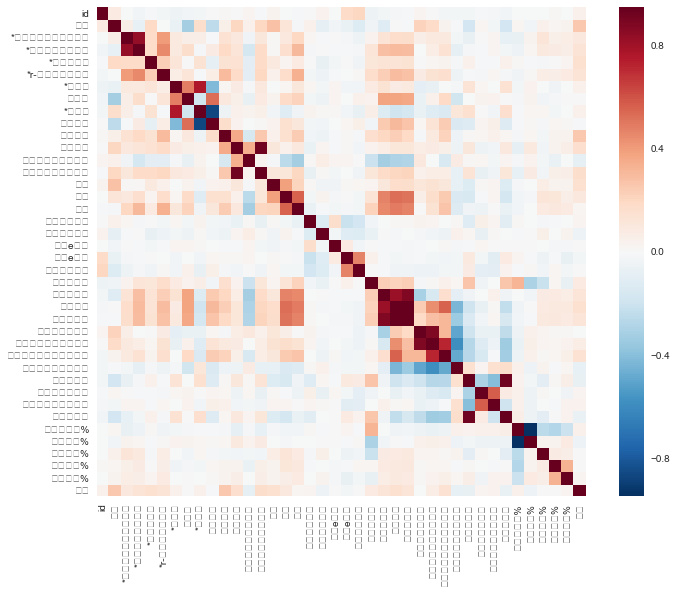

In [4]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [5]:
NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis = 1, keys=['Train','Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
*r-谷氨酰基转换酶,1221,185.0
*丙氨酸氨基转换酶,1221,185.0
*天门冬氨酸氨基转换酶,1221,185.0
*总蛋白,1221,185.0
*球蛋白,1221,185.0
*碱性磷酸酶,1221,185.0
中性粒细胞%,16,5.0
乙肝e抗体,4279,831.0
乙肝e抗原,4279,831.0
乙肝核心抗体,4279,831.0


In [6]:
train_labels = train.pop('血糖')
# sns.distplot(train_labels)
features = pd.concat([train, test],keys=['train','test'])

In [7]:
print(features.shape)
# 剔除缺失过多的特征
features.drop(['id','体检日期', '乙肝e抗体', '乙肝e抗原', '乙肝核心抗体', '乙肝表面抗体', '乙肝表面抗原'],axis=1,inplace=True)
print(features.shape)
features.describe()

(6642, 41)
(6642, 34)


,年龄,*天门冬氨酸氨基转换酶,*丙氨酸氨基转换酶,*碱性磷酸酶,*r-谷氨酰基转换酶,*总蛋白,白蛋白,*球蛋白,白球比例,甘油三酯,...,红细胞体积分布宽度,血小板计数,血小板平均体积,血小板体积分布宽度,血小板比积,中性粒细胞%,淋巴细胞%,单核细胞%,嗜酸细胞%,嗜碱细胞%
count,6642.000000,5236.000000,5236.000000,5236.000000,5236.000000,5236.000000,5236.000000,5236.000000,5236.000000,5247.000000,...,6621.000000,6621.000000,6613.000000,6613.000000,6613.000000,6621.000000,6621.000000,6621.000000,6621.000000,6621.000000
mean,45.808642,26.789091,27.587544,87.564291,38.752624,76.830267,45.858604,30.971663,1.502246,1.843297,...,12.755399,252.409757,10.617949,13.373144,0.266433,56.739012,33.783673,6.845371,2.028999,0.604954
std,12.974183,13.199059,22.298356,25.604687,41.465209,4.026034,2.597632,3.559522,0.216692,1.774067,...,1.034982,60.852776,1.016311,2.212748,0.062997,7.848217,7.304731,1.558489,1.700691,0.294521
min,3.000000,10.040000,0.120000,22.980000,6.360000,57.320000,29.540000,7.060000,0.520000,0.270000,...,10.700000,37.000000,6.700000,8.000000,0.042000,14.400000,7.500000,1.300000,0.000000,0.000000
25%,35.000000,20.260000,15.137500,70.240000,17.777500,74.230000,44.160000,28.610000,1.360000,0.970000,...,12.200000,212.000000,10.000000,11.700000,0.229000,51.600000,28.800000,5.800000,0.900000,0.400000
50%,45.000000,23.895000,21.465000,84.640000,26.135000,76.670000,45.830000,30.830000,1.490000,1.430000,...,12.600000,248.000000,10.600000,13.000000,0.260000,56.800000,33.600000,6.700000,1.600000,0.600000
75%,55.000000,29.270000,32.242500,100.495000,43.612500,79.600000,47.580000,33.180000,1.620000,2.150000,...,13.100000,288.000000,11.300000,14.700000,0.300000,62.000000,38.500000,7.700000,2.600000,0.700000
max,93.000000,434.950000,498.890000,374.320000,736.990000,100.410000,54.080000,66.180000,7.120000,41.570000,...,23.800000,1271.000000,15.200000,25.300000,1.520000,88.500000,76.300000,23.200000,22.500000,3.500000


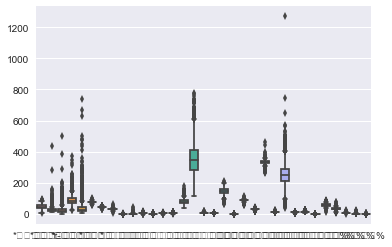

In [8]:
sns.boxplot(data=features)

In [11]:
# # 缺失值较少的特征处理
features['中性粒细胞%'] = features['中性粒细胞%'].fillna(features['中性粒细胞%'].mean())
features['单核细胞%'] = features['单核细胞%'].fillna(features['单核细胞%'].mean())
features['嗜碱细胞%'] = features['嗜碱细胞%'].fillna(features['嗜碱细胞%'].mean())
features['嗜酸细胞%'] = features['嗜酸细胞%'].fillna(features['嗜酸细胞%'].mean())
features['淋巴细胞%'] = features['淋巴细胞%'].fillna(features['淋巴细胞%'].mean())
features['白细胞计数'] = features['白细胞计数'].fillna(features['白细胞计数'].mean())
features['红细胞体积分布宽度'] = features['红细胞体积分布宽度'].fillna(features['红细胞体积分布宽度'].mean())
features['红细胞压积'] = features['红细胞压积'].fillna(features['红细胞压积'].mean())
features['红细胞平均体积'] = features['红细胞平均体积'].fillna(features['红细胞平均体积'].mean())         
features['红细胞平均血红蛋白浓度'] = features['红细胞平均血红蛋白浓度'].fillna(features['红细胞平均血红蛋白浓度'].mean())       
features['红细胞平均血红蛋白量'] = features['红细胞平均血红蛋白量'].fillna(features['红细胞平均血红蛋白量'].mean())       
features['红细胞计数'] = features['红细胞计数'].fillna(features['红细胞计数'].mean())
features['血小板体积分布宽度'] = features['血小板体积分布宽度'].fillna(features['血小板体积分布宽度'].mean())
features['血小板平均体积'] = features['血小板平均体积'].fillna(features['血小板平均体积'].mean())
features['血小板比积'] = features['血小板比积'].fillna(features['血小板比积'].mean())
features['血小板计数'] = features['血小板计数'].fillna(features['血小板计数'].mean())
features['血红蛋白'] = features['血红蛋白'].fillna(features['血红蛋白'].mean())

In [16]:
features['*天门冬氨酸氨基转换酶'] = features['*丙氨酸氨基转换酶'].fillna(features['*丙氨酸氨基转换酶'].mean())
features['*丙氨酸氨基转换酶'] = features['*丙氨酸氨基转换酶'].fillna(features['*丙氨酸氨基转换酶'].mean())
features['*碱性磷酸酶'] = features['*碱性磷酸酶'].fillna(features['*碱性磷酸酶'].mean())
features['*r-谷氨酰基转换酶'] = features['*r-谷氨酰基转换酶'].fillna(features['*r-谷氨酰基转换酶'].mean())
features['*总蛋白'] = features['*总蛋白'].fillna(features['*总蛋白'].mean())
features['白蛋白'] = features['白蛋白'].fillna(features['白蛋白'].mean())
features['*球蛋白'] = features['*球蛋白'].fillna(features['*球蛋白'].mean())
features['白球比例'] = features['白球比例'].fillna(features['白球比例'].mean())
features['甘油三酯'] = features['甘油三酯'].fillna(features['甘油三酯'].mean())
features['总胆固醇'] = features['总胆固醇'].fillna(features['总胆固醇'].mean())
features['高密度脂蛋白胆固醇'] = features['高密度脂蛋白胆固醇'].fillna(features['高密度脂蛋白胆固醇'].mean())
features['低密度脂蛋白胆固醇'] = features['低密度脂蛋白胆固醇'].fillna(features['低密度脂蛋白胆固醇'].mean())
features['尿素'] = features['尿素'].fillna(features['尿素'].mean())
features['肌酐'] = features['肌酐'].fillna(features['肌酐'].mean())
features['尿酸'] = features['尿酸'].fillna(features['尿酸'].mean())

In [17]:
features.isnull().sum()

性别             0
年龄             0
*天门冬氨酸氨基转换酶    0
*丙氨酸氨基转换酶      0
*碱性磷酸酶         0
*r-谷氨酰基转换酶     0
*总蛋白           0
白蛋白            0
*球蛋白           0
白球比例           0
甘油三酯           0
总胆固醇           0
高密度脂蛋白胆固醇      0
低密度脂蛋白胆固醇      0
尿素             0
肌酐             0
尿酸             0
白细胞计数          0
红细胞计数          0
血红蛋白           0
红细胞压积          0
红细胞平均体积        0
红细胞平均血红蛋白量     0
红细胞平均血红蛋白浓度    0
红细胞体积分布宽度      0
血小板计数          0
血小板平均体积        0
血小板体积分布宽度      0
血小板比积          0
中性粒细胞%         0
淋巴细胞%          0
单核细胞%          0
嗜酸细胞%          0
嗜碱细胞%          0
dtype: int64

In [18]:
features.head()

性别  年龄  *天门冬氨酸氨基转换酶  *丙氨酸氨基转换酶  *碱性磷酸酶  *r-谷氨酰基转换酶   *总蛋白    白蛋白  \
train 0  男  41        23.10      23.10   99.59       20.23  76.88  49.60   
      1  男  41        36.25      36.25   67.21       79.00  79.43  47.76   
      2  男  46        15.23      15.23   63.69       38.17  86.23  48.00   
      3  女  22        10.59      10.59   74.08       20.22  70.98  44.02   
      4  女  48        14.78      14.78   75.79       22.72  78.05  41.83   

          *球蛋白  白球比例  ...    红细胞体积分布宽度  血小板计数  血小板平均体积  血小板体积分布宽度  血小板比积  \
train 0  27.28  1.82  ...         12.8  166.0      9.9       17.4  0.164   
      1  31.67  1.51  ...         13.4  277.0      9.2       10.3  0.260   
      2  38.23  1.26  ...         13.0  241.0      8.3       16.6  0.199   
      3  26.96  1.63  ...         12.6  252.0     10.3       10.8  0.260   
      4  36.22  1.15  ...         16.6  316.0     11.1       14.0  0.350   

         中性粒细胞%  淋巴细胞%  单核细胞%  嗜酸细胞%  嗜碱细胞%  
train 0    54.1   34.2    6.5    4.7    0.6  
      1    52.0   36.7    5.8    4.7    0.8  
      2    48.1   40.3    7.7    3.2    0.8  
      3    41.7   46.5    6.7    4.6    0.5  
      4    56.6   33.1    9.1    0.6    0.6  

[5 rows x 34 columns]

In [25]:
features['性别'] = features['性别'].map({'男':1,'女':0})

In [26]:
features.head()

性别  年龄  *天门冬氨酸氨基转换酶  *丙氨酸氨基转换酶  *碱性磷酸酶  *r-谷氨酰基转换酶   *总蛋白    白蛋白  \
train 0  1.0  41        23.10      23.10   99.59       20.23  76.88  49.60   
      1  1.0  41        36.25      36.25   67.21       79.00  79.43  47.76   
      2  1.0  46        15.23      15.23   63.69       38.17  86.23  48.00   
      3  0.0  22        10.59      10.59   74.08       20.22  70.98  44.02   
      4  0.0  48        14.78      14.78   75.79       22.72  78.05  41.83   

          *球蛋白  白球比例  ...    红细胞体积分布宽度  血小板计数  血小板平均体积  血小板体积分布宽度  血小板比积  \
train 0  27.28  1.82  ...         12.8  166.0      9.9       17.4  0.164   
      1  31.67  1.51  ...         13.4  277.0      9.2       10.3  0.260   
      2  38.23  1.26  ...         13.0  241.0      8.3       16.6  0.199   
      3  26.96  1.63  ...         12.6  252.0     10.3       10.8  0.260   
      4  36.22  1.15  ...         16.6  316.0     11.1       14.0  0.350   

         中性粒细胞%  淋巴细胞%  单核细胞%  嗜酸细胞%  嗜碱细胞%  
train 0    54.1   34.2    6.5    4.7    0.6  
      1    52.0   36.7    5.8    4.7    0.8  
      2    48.1   40.3    7.7    3.2    0.8  
      3    41.7   46.5    6.7    4.6    0.5  
      4    56.6   33.1    9.1    0.6    0.6  

[5 rows x 34 columns]

In [34]:
train_features = features.loc['train'].values
test_features = features.loc['test'].values

In [39]:
import xgboost as xgb

In [35]:
xgb_train = xgb.DMatrix(train_features,train_labels)
xgb_test = xgb.DMatrix(test_features)

In [41]:
params = {"max_depth":2, "eta":0.1}

model = xgb.cv(params, xgb_train,num_boost_round=500,early_stopping_rounds=100)

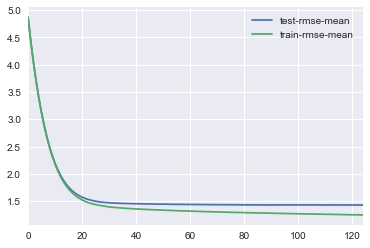

In [44]:
model.loc[:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [45]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)

In [48]:
model_xgb.fit(train_features,train_labels)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [50]:
predict = model_xgb.predict(test_features)

In [55]:
predict = np.round(predict,3)
submission = pd.DataFrame(predict)
submission.to_csv('medical_demo.csv',index=False)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x0000026873BCE6A0>>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
